### Nama : Anandita Agung Nugraha
### NIM  : 2209106042
##### Link Dataset : https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/code 

### **Import Library**

In [3]:
import tensorflow as tf
import pathlib
import splitfolders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
import os


### Membuat Folder Train, Test , Validation

In [4]:
import pathlib
Dataset_dir = "Rice_Image_Dataset"
Dataset_dir =pathlib.Path(Dataset_dir)

splitfolders.ratio(Dataset_dir, output="Rice_dataset", seed=101, ratio=(.7, .2, .1))

In [5]:
train_img_path = 'Rice_dataset/train'
test_img_path = 'Rice_dataset/val'
validation_img_path = 'Rice_dataset/test'

### Melakukan Image Augmentation dan Membuat Arsitektur CNN

In [6]:
train_datagen = ImageDataGenerator(
     rescale=1./255,          
    rotation_range=40,        
    width_shift_range=0.2,    
    height_shift_range=0.2, 
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,     
    fill_mode='nearest'
)


train_generator = train_datagen.flow_from_directory(
    train_img_path,
    target_size=(224, 224),  
    batch_size=32,
    shuffle = True,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(
    rescale=1./255
    )
val_generator = val_datagen.flow_from_directory(
    validation_img_path,
    target_size=(224,224), 
    batch_size=32,
    shuffle = True,
    class_mode='categorical'
)
test_datagen = ImageDataGenerator(
    rescale=1./255
    )
test_generator = test_datagen.flow_from_directory(
    test_img_path,
    target_size=(224,224), 
    batch_size=32,
    shuffle = True,
    class_mode='categorical'
)

Found 52500 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


### Menampilkan nama Kelas yang ada pada Dataset

In [7]:
class_names = list(train_generator.class_indices.keys())
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

### Modelling

### Membuat pre-trained model

In [8]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False



### Membuat Model Sequential

In [9]:
model = Sequential()

model.add(base_model)
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))


### Model Compile

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Proses Training menggunakan fungsi Callback

In [12]:

early_stopping = keras.callbacks.EarlyStopping( monitor='val_accuracy',patience=5,restore_best_weights=True)

reduce_lr = ReduceLROnPlateau( 
    monitor='val_loss',  
    factor=0.5,   
    patience=4,         
    min_lr=1e-6          
)

history = model.fit(
    train_generator,
    epochs=1,
    validation_data=val_generator,
    callbacks= [early_stopping, reduce_lr]
)

1641/1641 [==============================] - 3329s 2s/step - loss: 0.1304 - accuracy: 0.9597 - val_loss: 0.0656 - val_accuracy: 0.9783 - lr: 0.0010


 ### Evaluasi Model

In [21]:
model.evaluate(val_generator)

 39/235 [===>..........................] - ETA: 4:33 - loss: 0.0436 - accuracy: 0.9848

### Plot akurasi dan loss pada training dan validation

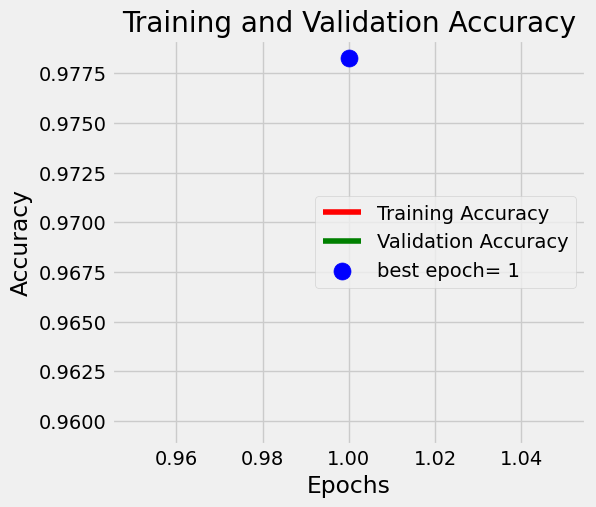

In [20]:

tr_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize= (12, 5))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

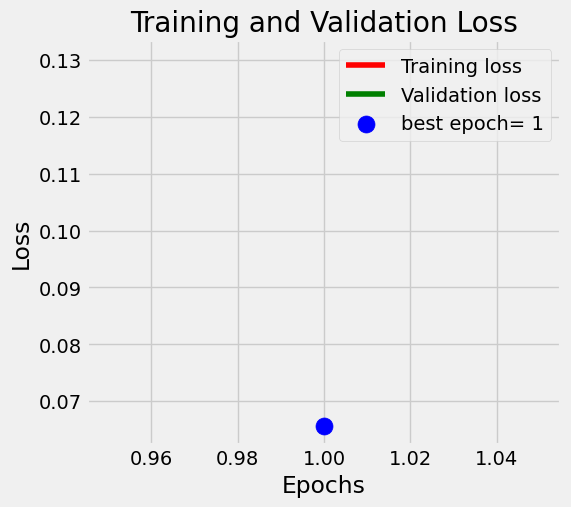

In [19]:

tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]



loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (12, 5))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()